In [1]:
# modules in other files
from DataGenerator import DataGenerator
from Models import CopyCatModel

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5pickle as h5py

Using TensorFlow backend.


In [5]:
# reload modules in case I change them
%load_ext autoreload
%autoreload 2

In [2]:
file = h5py.File('./Data/fonts.hdf5', 'r', skip_cache=False)

In [3]:
fonts = file['fonts']

In [4]:
dg = DataGenerator(fonts, batch_size=512, shuffle=False)

In [5]:
model = CopyCatModel(56443, 62, leaky_relu_alpha=0.1, regularization=0.001, lr=1)

In [6]:
# model.model.load_weights('./Weights/CopyCat-epoch-3.h5')

In [ ]:
model.model.fit_generator(dg) # , use_multiprocessing=True, workers=2)

Epoch 1/1


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\site-packages\keras\utils\data_utils.py", line 548, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\site-packages\keras\utils\data_utils.py", line 522, in <lambda>
    initargs=(seqs,))
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\multiprocessing\context.py", line 118, in Pool
    context=self.get_context())
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\multiprocessing\pool.py", line 174, in __init__
    self._repopulate_pool()
  File "C:\Users\david\Anaconda3\envs\KerasGPU2\lib\multiprocessing\pool.py", line 239, in _repopulate_pool
    w.sta

In [74]:
model.model.save_weights('./Weights/CopyCat-epoch-3.h5')

In [68]:
def plot_font(font):
    fig=plt.figure(figsize=(10, 10))
    columns = 8
    rows = 8
    for i in range(1, 62 +1):
        img = font[i-1].reshape(64, 64)
        fig.add_subplot(rows, columns, i)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [84]:
char = np.zeros((62, 62))
char[np.arange(62), np.arange(62)] = 1

In [85]:
fonts = np.zeros((62, 56443))
fonts[:, 0] = 1

In [86]:
t = model.model.predict([fonts, char])

In [93]:
(t[0] - t[1]).sum()

1.473606e-13

In [101]:
model.model.layers[1].get_weights()[0][0]

array([ 1.05458257e-05,  4.71287535e-07,  3.26014869e-03, -9.73217189e-04,
        1.76942386e-02, -2.70062150e-03, -5.45397683e-09,  6.74841349e-10,
        7.76132569e-04, -1.23622071e-04, -2.37660017e-04,  1.69689290e-10,
        1.06029969e-04,  1.45961903e-03, -6.37883750e-06, -3.56946856e-07,
       -1.56975002e-08, -2.52191330e-05, -8.48359889e-07,  5.48728389e-11,
        1.98477998e-10, -8.99239710e-11,  5.18519346e-06, -1.26354607e-07,
        1.27928215e-04,  9.75940893e-08,  4.58300553e-09, -1.96121007e-04,
       -1.25107125e-08, -9.66756772e-08,  6.86508372e-07,  1.52007976e-06,
        1.12366441e-04,  5.98805840e-04, -2.73753393e-08, -2.16137871e-10,
        2.48078886e-05,  1.10016769e-08,  3.34334539e-11, -2.94486907e-10],
      dtype=float32)

In [90]:
t[1]

array([9.5804982e-11, 3.3648238e-14, 4.5961919e-12, ..., 5.7821903e-17,
       2.3201511e-16, 7.7661255e-13], dtype=float32)

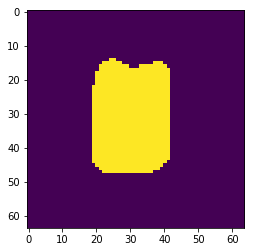

In [87]:
plt.imshow(t[-1].reshape(64, 64))

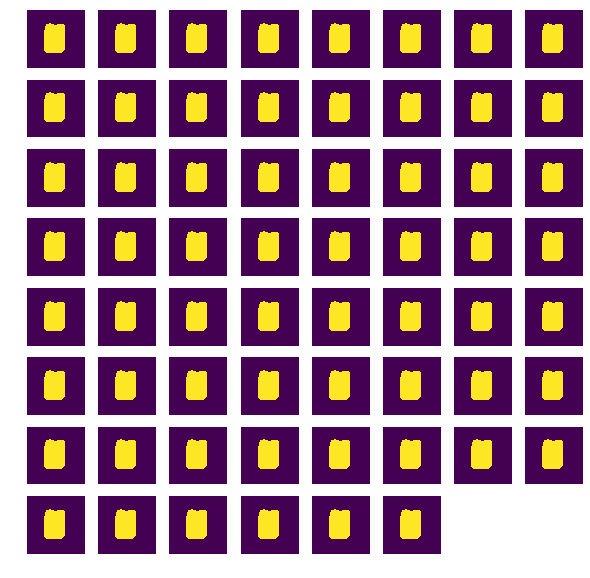

In [88]:
plot_font(t)